<h1> ELO Merchant Category Recommendation </h1>
<h2> Part IV - Feature Selection </h2>

In [26]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Basic Packages
import pandas as pd
import numpy as np
import datetime
import time
import warnings
warnings.filterwarnings('ignore')

# plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning packages
import lightgbm as lgb
from sklearn import model_selection, preprocessing, metrics
pd.set_option('display.max_columns',None)
from sklearn.metrics import mean_squared_error

/Users/liamroberts/anaconda3/envs/lgbmenv/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


First we will load our final train and test dataframes that we created in our first three notebooks.

In [3]:
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')
display(train.head())
display(test.head())

,card_id,feature_1,feature_2,feature_3,target,month,elapsed_time,hist_authorized_flag_mean,hist_card_id_count,hist_city_id_nunique,hist_category_1_sum,hist_category_1_mean,hist_category_1_std,hist_category_2_1.0_sum,hist_category_2_1.0_mean,hist_category_2_2.0_sum,hist_category_2_2.0_mean,hist_category_2_3.0_sum,hist_category_2_3.0_mean,hist_category_2_4.0_sum,hist_category_2_4.0_mean,hist_category_2_5.0_sum,hist_category_2_5.0_mean,hist_category_3_A_sum,hist_category_3_A_mean,hist_category_3_B_sum,hist_category_3_B_mean,hist_category_3_C_sum,hist_category_3_C_mean,hist_month_nunique,hist_hour_mean,hist_weekofyear_mean,hist_weekofyear_nunique,hist_day_nunique,hist_day_ptp,hist_day_mean,hist_dayofweek_mean,hist_weekend_sum,hist_weekend_mean,hist_duration_min,hist_duration_mean,hist_duration_max,hist_price_sum,hist_price_mean,hist_price_max,hist_price_min,hist_price_var,hist_amount_month_ratio_max,hist_amount_month_ratio_min,hist_amount_month_ratio_ptp,hist_installments_sum,hist_installments_min,hist_installments_max,hist_installments_var,hist_installments_mean,hist_merchant_category_id_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_var,hist_purchase_amount_median,hist_purchase_date_max,hist_purchase_date_min,hist_purchase_date_ptp,hist_time_since_purchase_date_min,hist_time_since_purchase_date_max,hist_time_since_purchase_date_mean,hist_month_lag_min,hist_month_lag_max,hist_month_lag_mean,hist_month_lag_var,hist_month_lag_ptp,hist_month_diff_mean,hist_month_diff_min,hist_month_diff_max,hist_month_diff_ptp,hist_month_diff_var,hist_store_size_min,hist_store_size_max,hist_store_size_mean,hist_city_size_min,hist_city_size_max,hist_city_size_mean,hist_state_size_min,hist_state_size_max,hist_state_size_mean,hist_subsector_size_min,hist_subsector_size_max,hist_subsector_size_mean,hist_category_size_min,hist_category_size_max,hist_category_size_mean,new_card_id_count,new_city_id_nunique,new_category_1_sum,new_category_1_mean,new_category_2_1.0_sum,new_category_2_1.0_mean,new_category_2_2.0_sum,new_category_2_2.0_mean,new_category_2_3.0_sum,new_category_2_3.0_mean,new_category_2_4.0_sum,new_category_2_4.0_mean,new_category_2_5.0_sum,new_category_2_5.0_mean,new_category_3_A_sum,new_category_3_A_mean,new_category_3_B_sum,new_category_3_B_mean,new_category_3_C_sum,new_category_3_C_mean,new_month_nunique,new_weekofyear_nunique,new_day_nunique,new_day_ptp,new_day_mean,new_dayofweek_mean,new_duration_min,new_duration_max,new_price_sum,new_price_mean,new_price_max,new_price_min,new_price_var,new_amount_month_ratio_max,new_amount_month_ratio_min,new_amount_month_ratio_ptp,new_installments_sum,new_installments_min,new_installments_max,new_installments_var,new_installments_mean,new_merchant_category_id_nunique,new_merchant_id_nunique,new_purchase_amount_sum,new_purchase_amount_mean,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_var,new_purchase_date_max,new_purchase_date_min,new_purchase_date_ptp,new_time_since_purchase_date_min,new_time_since_purchase_date_max,new_time_since_purchase_date_mean,new_weekend_sum,new_weekend_mean,new_month_lag_min,new_month_lag_max,new_month_lag_mean,new_month_lag_var,new_month_lag_ptp,new_month_diff_mean,new_month_diff_min,new_month_diff_max,new_month_diff_ptp,max_repeat_purchases,mean_repeat_purchases,mean_merchant_purchases,mean_category_purchases,mean_monthly_purchases,hist_purchase_date_uptonow,new_purchase_date_uptonow,quarter,days_feature1,days_feature2,days_feature3,days_feature1_ratio,days_feature2_ratio,days_feature3_ratio,first_month,first_year,category_1_mean,new_CLV,hist_CLV,transactions_ratio,mean_purchase_ratio,max_purchase_ratio,sum_purchase_amount_ratio,mean_month_lag_ratio,mean_month_diff_ratio,sum_installments_ratio,mean_installments_ratio,min_duration_ratio,transactions_product,mean_purchase_product,max_purchase_product,sum_purchase_amount_product,mean_month_lag_product

,card_id,feature_1,feature_2,feature_3,month,elapsed_time,hist_authorized_flag_mean,hist_card_id_count,hist_city_id_nunique,hist_category_1_sum,hist_category_1_mean,hist_category_1_std,hist_category_2_1.0_sum,hist_category_2_1.0_mean,hist_category_2_2.0_sum,hist_category_2_2.0_mean,hist_category_2_3.0_sum,hist_category_2_3.0_mean,hist_category_2_4.0_sum,hist_category_2_4.0_mean,hist_category_2_5.0_sum,hist_category_2_5.0_mean,hist_category_3_A_sum,hist_category_3_A_mean,hist_category_3_B_sum,hist_category_3_B_mean,hist_category_3_C_sum,hist_category_3_C_mean,hist_month_nunique,hist_hour_mean,hist_weekofyear_mean,hist_weekofyear_nunique,hist_day_nunique,hist_day_ptp,hist_day_mean,hist_dayofweek_mean,hist_weekend_sum,hist_weekend_mean,hist_duration_min,hist_duration_mean,hist_duration_max,hist_price_sum,hist_price_mean,hist_price_max,hist_price_min,hist_price_var,hist_amount_month_ratio_max,hist_amount_month_ratio_min,hist_amount_month_ratio_ptp,hist_installments_sum,hist_installments_min,hist_installments_max,hist_installments_var,hist_installments_mean,hist_merchant_category_id_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_mean,hist_purchase_amount_max,hist_purchase_amount_min,hist_purchase_amount_var,hist_purchase_amount_median,hist_purchase_date_max,hist_purchase_date_min,hist_purchase_date_ptp,hist_time_since_purchase_date_min,hist_time_since_purchase_date_max,hist_time_since_purchase_date_mean,hist_month_lag_min,hist_month_lag_max,hist_month_lag_mean,hist_month_lag_var,hist_month_lag_ptp,hist_month_diff_mean,hist_month_diff_min,hist_month_diff_max,hist_month_diff_ptp,hist_month_diff_var,hist_store_size_min,hist_store_size_max,hist_store_size_mean,hist_city_size_min,hist_city_size_max,hist_city_size_mean,hist_state_size_min,hist_state_size_max,hist_state_size_mean,hist_subsector_size_min,hist_subsector_size_max,hist_subsector_size_mean,hist_category_size_min,hist_category_size_max,hist_category_size_mean,new_card_id_count,new_city_id_nunique,new_category_1_sum,new_category_1_mean,new_category_2_1.0_sum,new_category_2_1.0_mean,new_category_2_2.0_sum,new_category_2_2.0_mean,new_category_2_3.0_sum,new_category_2_3.0_mean,new_category_2_4.0_sum,new_category_2_4.0_mean,new_category_2_5.0_sum,new_category_2_5.0_mean,new_category_3_A_sum,new_category_3_A_mean,new_category_3_B_sum,new_category_3_B_mean,new_category_3_C_sum,new_category_3_C_mean,new_month_nunique,new_weekofyear_nunique,new_day_nunique,new_day_ptp,new_day_mean,new_dayofweek_mean,new_duration_min,new_duration_max,new_price_sum,new_price_mean,new_price_max,new_price_min,new_price_var,new_amount_month_ratio_max,new_amount_month_ratio_min,new_amount_month_ratio_ptp,new_installments_sum,new_installments_min,new_installments_max,new_installments_var,new_installments_mean,new_merchant_category_id_nunique,new_merchant_id_nunique,new_purchase_amount_sum,new_purchase_amount_mean,new_purchase_amount_max,new_purchase_amount_min,new_purchase_amount_var,new_purchase_date_max,new_purchase_date_min,new_purchase_date_ptp,new_time_since_purchase_date_min,new_time_since_purchase_date_max,new_time_since_purchase_date_mean,new_weekend_sum,new_weekend_mean,new_month_lag_min,new_month_lag_max,new_month_lag_mean,new_month_lag_var,new_month_lag_ptp,new_month_diff_mean,new_month_diff_min,new_month_diff_max,new_month_diff_ptp,max_repeat_purchases,mean_repeat_purchases,mean_merchant_purchases,mean_category_purchases,mean_monthly_purchases,hist_purchase_date_uptonow,new_purchase_date_uptonow,quarter,days_feature1,days_feature2,days_feature3,days_feature1_ratio,days_feature2_ratio,days_feature3_ratio,first_month,first_year,category_1_mean,new_CLV,hist_CLV,transactions_ratio,mean_purchase_ratio,max_purchase_ratio,sum_purchase_amount_ratio,mean_month_lag_ratio,mean_month_diff_ratio,sum_installments_ratio,mean_installments_ratio,min_duration_ratio,transactions_product,mean_purchase_product,max_purchase_product,sum_purchase_amount_product,mean_month_lag_product,mean_m

The method we use here is known as Permutative Feature Importance. It consists of first training a model on the entire training set to get a "true" evaluation of feature importance for the model. Then training many iterations of the model on different subsets to get "null" importances. Finally we compare the "null" importances to the "true" importances and calculate a score for each feature. We can then set a threshold for this score to reduce redundant features in our model.

### Calculate Feature Importances for Full Train Set

In [6]:
def get_feature_imp(data,features,shuffle):
    y = data['target'].copy()
    
    if shuffle:
        y=data['target'].copy().sample(frac=1.0)
    
    dtrain = lgb.Dataset(data[features],y)
    
    lgb_params = {
        'task': 'train',
        'boosting': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.01,
        'subsample': 0.6,
        'bagging_freq':1,
        'max_depth': 7,
        'top_rate': 0.91,
        'num_leaves': 63,
        'min_child_weight': 41.96,
        'other_rate': 0.072,
        'reg_alpha': 9.67,
        'colsample_bytree': 0.566,
        'min_split_gain': 9.82,
        'reg_lambda': 8.25,
        'min_data_in_leaf': 21,
        'verbose': -1,
        'seed':2333,
        }
    
    clf = lgb.train(lgb_params,
                    dtrain,
                    200)
    
    imp_df = pd.DataFrame()
    imp_df['feature'] = features
    imp_df['importance_gain'] = clf.feature_importance(importance_type='gain')
    imp_df['train_score'] = np.sqrt(mean_squared_error(clf.predict(data[features]),y))
    
    return imp_df

In [18]:
useless_features = ['target',
                    'card_id',
                    'new_authorized_flag_mean',
                    'outliers'
                   ]

features = [name for name in train.columns if name not in useless_features]
target = train['target']

# Dealing with outliers
train['outliers'] = 0
train.loc[train['target'] < -30,'outliers'] = 1

In [8]:
actual_imp_df = get_feature_imp(train,features,False)
actual_imp_df.head()

,feature,importance_gain,train_score
0,feature_1,3331.487587,3.588555
1,feature_2,1595.885986,3.588555
2,feature_3,0.000000,3.588555
3,month,12291.171104,3.588555
4,elapsed_time,52703.546402,3.588555


### Calculate Null Importances on Random Subsamples of Training Set

In [9]:
null_imp_df = pd.DataFrame()
nb_runs = 50
start = time.time()
dsp = ''
for i in range(nb_runs):
    imp_df = get_feature_imp(train,features,shuffle=True)
    imp_df['run'] = i + 1
    null_imp_df = pd.concat([null_imp_df,imp_df],axis=0)    
    dsp = f'Done run {i+1}/{nb_runs} after {(time.time()-start)/60:.2f} min...'
    print(dsp,end='\r',flush=True)

In [10]:
imp_df.head()

,feature,importance_gain,train_score,run
0,feature_1,2914.082585,3.828116,50
1,feature_2,403.681793,3.828116,50
2,feature_3,0.000000,3.828116,50
3,month,8180.134804,3.828116,50
4,elapsed_time,3911.862561,3.828116,50


### Calculate Score Based on Difference between True and Null Feature Importances

In [11]:
correlation_scores = []
for _f in actual_imp_df['feature'].unique():
    f_null_imps = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps = actual_imp_df.loc[actual_imp_df['feature'] == _f, 'importance_gain'].values
    gain_score = 100 * (f_null_imps < np.percentile(f_act_imps, 25)).sum() / f_null_imps.size
    correlation_scores.append((_f,gain_score))
corr_scores_df = pd.DataFrame(correlation_scores, columns=['feature', 'gain_score'])

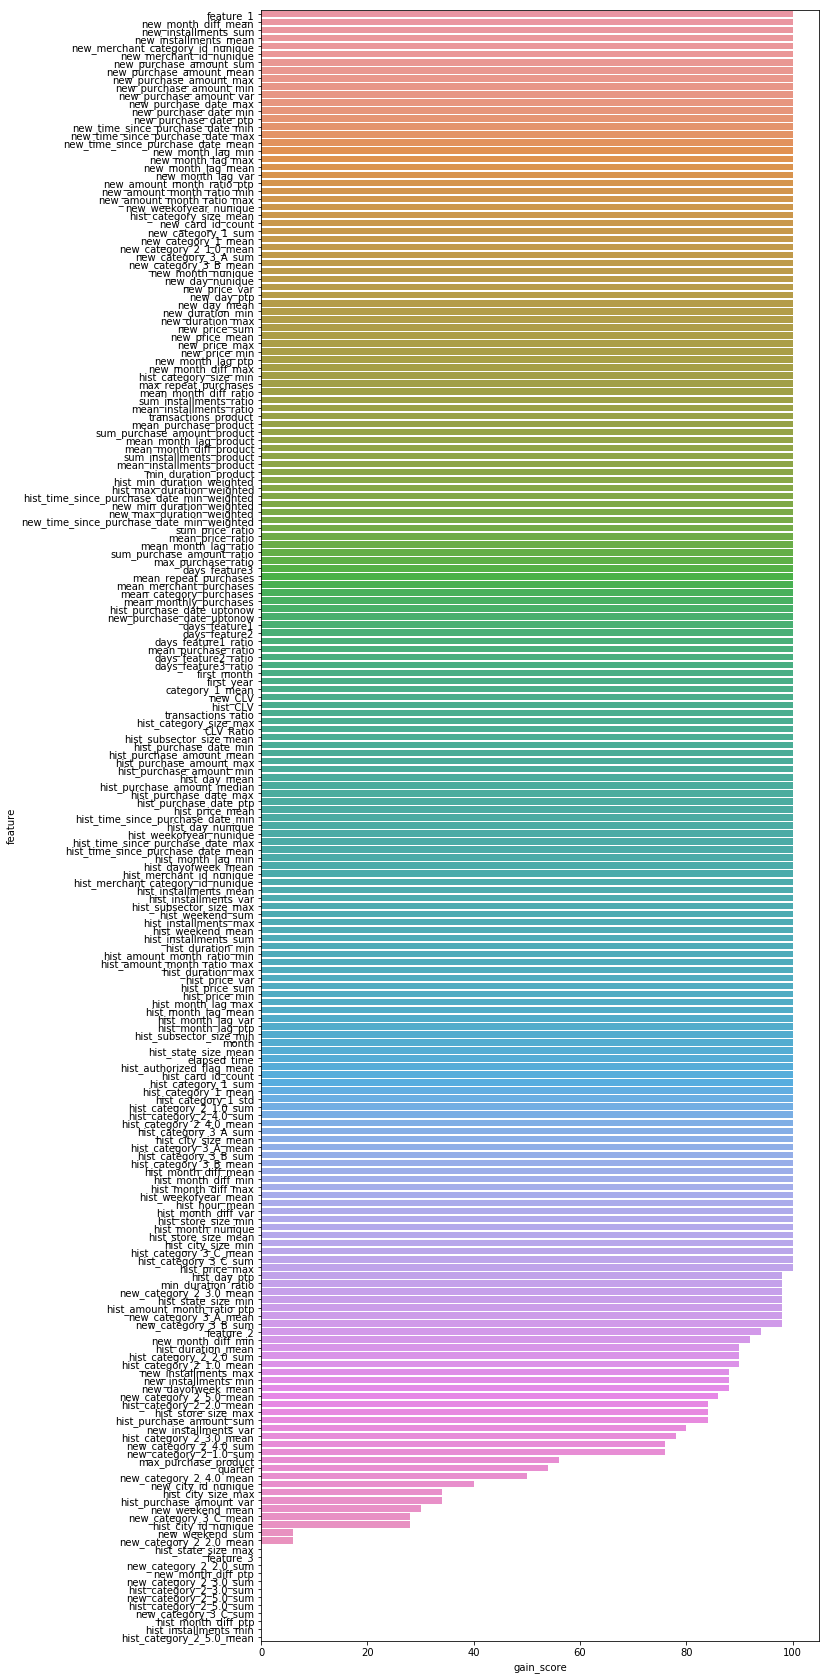

In [14]:
corr_scores_df.sort_values('gain_score',ascending=False,inplace=True)
plt.figure(figsize=(10,30))
sns.barplot(x='gain_score',y='feature',data=corr_scores_df)
plt.show()

In [22]:
def score_feature_selection(df=None,features=None,target=None):
    lgb_params = {
        'task': 'train',
        'boosting': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.01,
        'subsample': 0.95,
        'bagging_freq':1,
        'max_depth': 7,
        'top_rate': 0.91,
        'num_leaves': 63,
        'min_child_weight': 41.96,
        'other_rate': 0.072,
        'reg_alpha': 9.67,
        'colsample_bytree': 0.566,
        'min_split_gain': 9.82,
        'reg_lambda': 8.25,
        'min_data_in_leaf': 21,
        'verbose': -1,
        'seed':2333,
        }
    folds = model_selection.StratifiedKFold(n_splits=4,shuffle=True,random_state=16)
    lgb_oof = np.zeros(len(df))

    for fold_, (train_index,valid_index) in enumerate(folds.split(df[features],df['outliers'].values)):

        train_data = lgb.Dataset(df.iloc[train_index][features],label=target.iloc[train_index])
        val_data = lgb.Dataset(df.iloc[valid_index][features],label=target.iloc[valid_index])

        num_rounds = 2000

        lgb_model = lgb.train(lgb_params,
                        train_data,
                        num_rounds,
                        valid_sets=[train_data,val_data],
                        verbose_eval=0,
                        early_stopping_rounds=200)

        lgb_oof[valid_index] = lgb_model.predict(df.iloc[valid_index][features],num_iteration=lgb_model.best_iteration)
    
    return np.sqrt(mean_squared_error(lgb_oof, target))

### Calculate CV Scores Based on Feature Importance Score Thresholds

In [23]:
threshold_scores = []
for threshold in [0,10,20,30,40,50,60,70,80,90,95,99]:
    start = time.time()
    gain_feats = [_f for _f, _score in correlation_scores if _score >= threshold]
    gain_results = score_feature_selection(df=train, features=gain_feats, target=target)
    print(f'Threshold:{threshold}, RMSE:{gain_results:.4f}, Time:{(time.time()-start)/60:.2f}min')
    threshold_scores.append((threshold,gain_results))

Threshold:0, RMSE:3.6461, Time:5.23min
Threshold:10, RMSE:3.6455, Time:4.68min
Threshold:20, RMSE:3.6455, Time:5.02min
Threshold:30, RMSE:3.6456, Time:5.09min
Threshold:40, RMSE:3.6452, Time:4.97min
Threshold:50, RMSE:3.6468, Time:4.99min
Threshold:60, RMSE:3.6461, Time:4.40min
Threshold:70, RMSE:3.6461, Time:4.00min
Threshold:80, RMSE:3.6454, Time:4.24min
Threshold:90, RMSE:3.6456, Time:4.57min
Threshold:95, RMSE:3.6459, Time:4.06min
Threshold:99, RMSE:3.6449, Time:4.30min


In [24]:
threshold_scores_df = pd.DataFrame(threshold_scores,columns = ['threshold','rmse'])
threshold_scores_df.sort_values('rmse',inplace=True)
threshold_scores_df.head()

,threshold,rmse
11,99,3.644858
4,40,3.645231
8,80,3.645383
1,10,3.645528
2,20,3.645528


Lets go ahead and use a threshold of 95.

In [25]:
drop_feats = [_f for _f, _score in correlation_scores if _score < 99]
list(drop_feats)

['feature_2',
 'feature_3',
 'hist_city_id_nunique',
 'hist_category_2_1.0_mean',
 'hist_category_2_2.0_sum',
 'hist_category_2_2.0_mean',
 'hist_category_2_3.0_sum',
 'hist_category_2_3.0_mean',
 'hist_category_2_5.0_sum',
 'hist_category_2_5.0_mean',
 'hist_day_ptp',
 'hist_duration_mean',
 'hist_amount_month_ratio_ptp',
 'hist_installments_min',
 'hist_purchase_amount_sum',
 'hist_purchase_amount_var',
 'hist_month_diff_ptp',
 'hist_store_size_max',
 'hist_city_size_max',
 'hist_state_size_min',
 'hist_state_size_max',
 'new_city_id_nunique',
 'new_category_2_1.0_sum',
 'new_category_2_2.0_sum',
 'new_category_2_2.0_mean',
 'new_category_2_3.0_sum',
 'new_category_2_3.0_mean',
 'new_category_2_4.0_sum',
 'new_category_2_4.0_mean',
 'new_category_2_5.0_sum',
 'new_category_2_5.0_mean',
 'new_category_3_A_mean',
 'new_category_3_B_sum',
 'new_category_3_C_sum',
 'new_category_3_C_mean',
 'new_dayofweek_mean',
 'new_installments_min',
 'new_installments_max',
 'new_installments_var',
 

---